# DIABETES DATASET 

### DECISION TREE CLASSIFICATION

In [123]:
# Libraries in use
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, classification_report,accuracy_score, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [124]:
#loading dataset
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
#feature variables
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [126]:
#target variable
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [128]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [129]:
y_train_pred = model.predict(x_train)

In [130]:
accuracy_score(y_train,y_train_pred) #Overfitting

1.0

In [131]:
#Evaluation using Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100) 

Accuracy: 69.48051948051948


In [132]:
confusion_matrix(y_test,y_pred)

array([[77, 22],
       [25, 30]], dtype=int64)

In [133]:
# Evaluation using Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.58      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



[Text(0.5, 0.875, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'Age <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.125, 0.375, 'BMI <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Glucose <= 99.5\ngini = 0.435\nsamples = 172\nvalue = [117, 55]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'BMI <= 29.95\ngini = 0.474\nsamples = 225\nvalue = [87, 138]'),
 Text(0.625, 0.375, 'Glucose <= 145.5\ngini = 0.458\nsamples = 62\nvalue = [40, 22]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Glucose <= 154.5\ngini = 0.41\nsamples = 163\nvalue = [47, 116]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

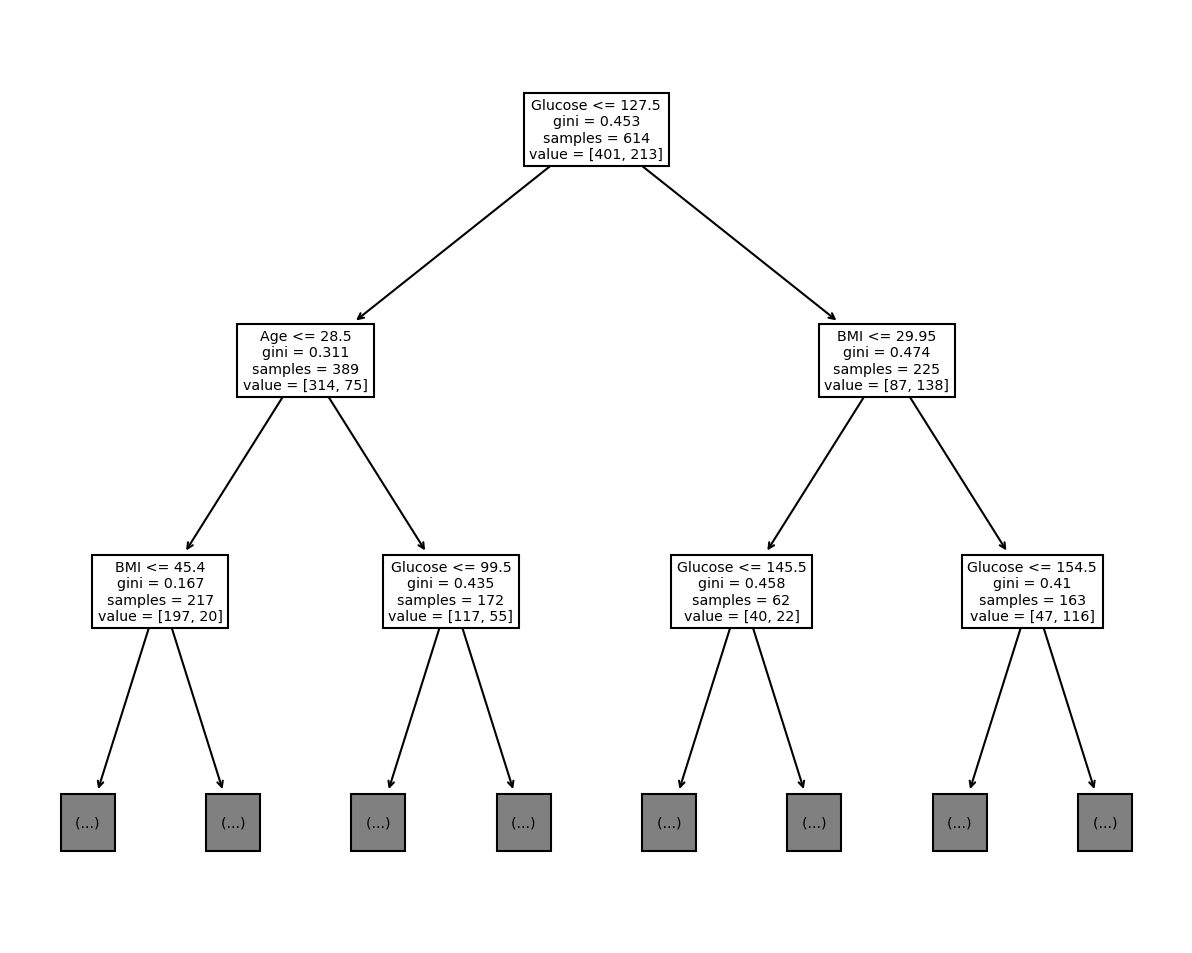

In [138]:
# Plotting Decision Tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=x.columns,max_depth=2)

In [42]:
# Inputting new parameters to make the model better
parameters={'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf':[5,10,15,20,25]} 

In [45]:
dtr_gcb.best_params_

{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 2}

In [67]:
model_tuned=DecisionTreeClassifier(max_depth=5,min_samples_leaf=25,min_samples_split=2)
model_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25)

In [66]:
y_pred2 = model_tuned.predict(x_test)
y_train_pred2 = model_tuned.predict(x_train)

In [68]:
accuracy_score(y_train,y_train_pred2)

0.7996742671009772

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)

Accuracy: 79.22077922077922


[Text(0.4751984126984127, 0.9285714285714286, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.21825396825396826, 0.7857142857142857, 'Age <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.13095238095238096, 0.6428571428571429, 'BMI <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.0873015873015873, 0.5, 'BMI <= 30.95\ngini = 0.147\nsamples = 213\nvalue = [196, 17]'),
 Text(0.047619047619047616, 0.35714285714285715, 'Pregnancies <= 7.5\ngini = 0.031\nsamples = 126\nvalue = [124, 2]'),
 Text(0.031746031746031744, 0.21428571428571427, 'DiabetesPedigreeFunction <= 0.668\ngini = 0.016\nsamples = 125\nvalue = [124, 1]'),
 Text(0.015873015873015872, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.047619047619047616, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.06349206349206349, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12698412698412698, 0.35714285714285715, 'DiabetesPedigreeFunction <= 0.895\ngin

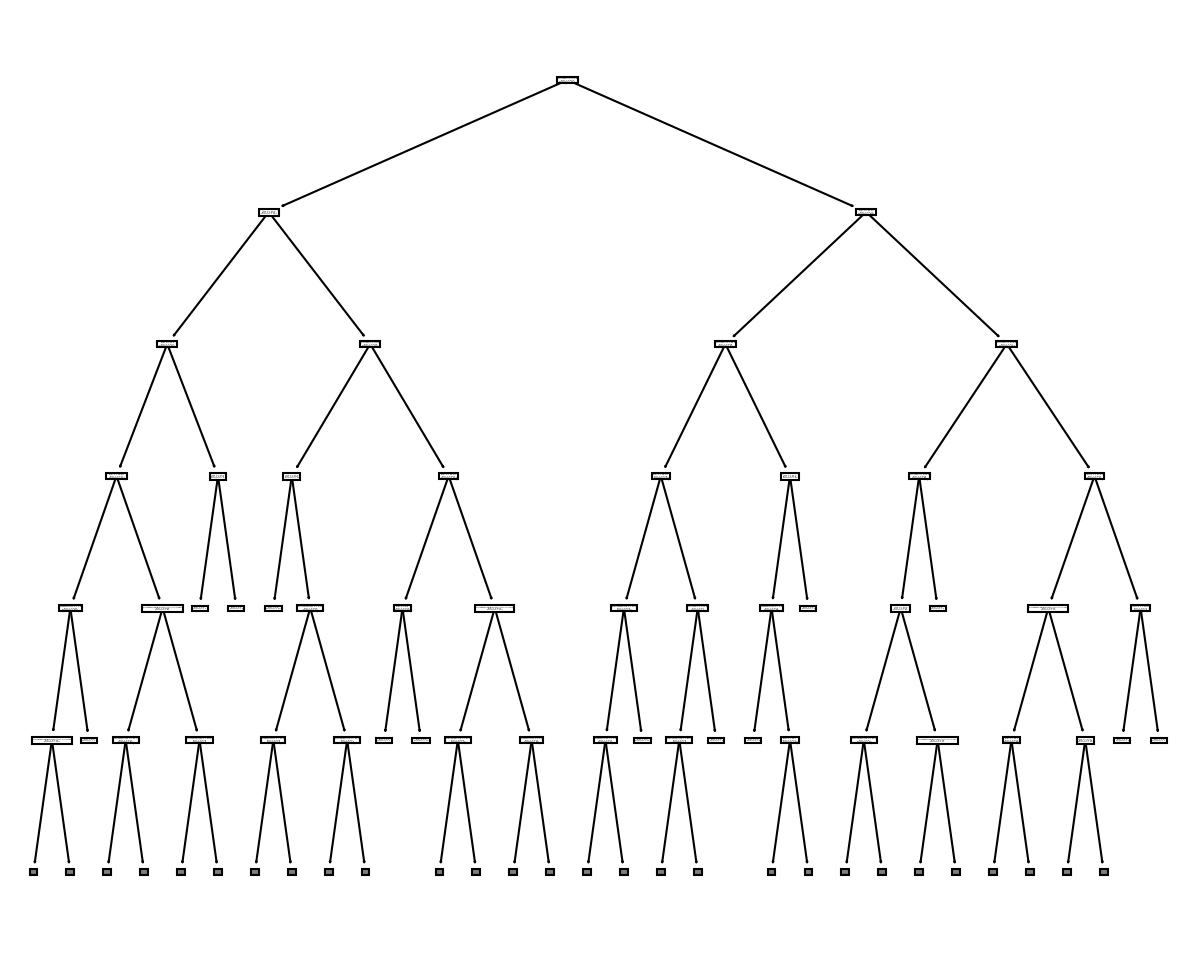

In [141]:
# Plotting Decision Tree after updating parameters
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=x.columns,max_depth=5)

In [79]:
# Creating new dataframe to hold certain key values
ROC=pd.DataFrame(columns=['Threshold','TP','TN','FP','FN','TPR','FPR'])
ROC

,Threshold,TP,TN,FP,FN,TPR,FPR


In [80]:
df['prob']=model_tuned.predict_proba(x)[:,1] 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prob
0,6,148,72,35,0,33.6,0.627,50,1,0.727273
1,1,85,66,29,0,26.6,0.351,31,0,0.104167
2,8,183,64,0,0,23.3,0.672,32,1,0.551724
3,1,89,66,23,94,28.1,0.167,21,0,0.000000
4,0,137,40,35,168,43.1,2.288,33,1,0.727273
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.371429
764,2,122,70,27,0,36.8,0.340,27,0,0.276596
765,5,121,72,23,112,26.2,0.245,30,0,0.115385
766,1,126,60,0,0,30.1,0.349,47,1,0.371429



     Threshold     TP     TN     FP     FN       TPR    FPR
0         0.0  268.0  113.0  387.0    0.0  1.000000  0.774
1         0.1  266.0  149.0  351.0    2.0  0.992537  0.702
2         0.2  239.0  321.0  179.0   29.0  0.891791  0.358
3         0.3  226.0  368.0  132.0   42.0  0.843284  0.264
4         0.4  192.0  417.0   83.0   76.0  0.716418  0.166
5         0.5  170.0  443.0   57.0   98.0  0.634328  0.114
6         0.6  152.0  460.0   40.0  116.0  0.567164  0.080
7         0.7  152.0  460.0   40.0  116.0  0.567164  0.080
8         0.8   58.0  494.0    6.0  210.0  0.216418  0.012
9         0.9   30.0  499.0    1.0  238.0  0.111940  0.002
10        1.0    0.0  500.0    0.0  268.0  0.000000  0.000

AUC: 0.8628507462686567


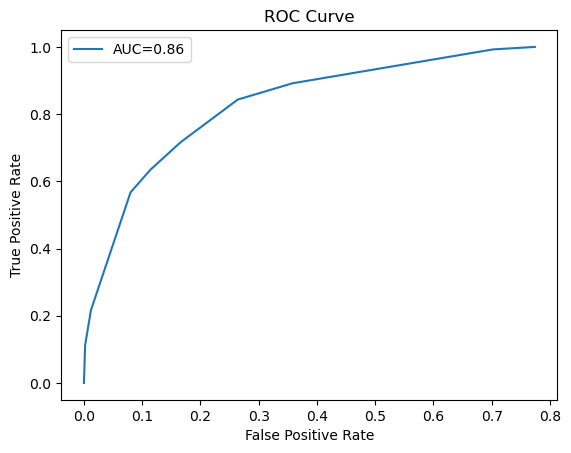

In [81]:
# Calculating the threshold
for threshold in np.arange(0,1.1,0.1):
    y_pred = (df['prob'] > threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    ROC.loc[len(ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})
    
# Compute AUC
auc = roc_auc_score(y, df['prob'])
print('\n',ROC)
print('\nAUC:', auc)

# Plot ROC curve from ROC
plt.plot(ROC['FPR'], ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [82]:
#calculating the best threshold
ROC['TPR-FPR']=ROC['TPR']-ROC['FPR']
max_thrs=ROC['TPR-FPR'].max()
best_thrs=ROC[ROC['TPR-FPR']==max_thrs]['Threshold'].values[0]
print("BEST THRESHOLD VALUE: ",best_thrs)

BEST THRESHOLD VALUE:  0.30000000000000004


In [83]:
# Computing confusion matrix for this threshold
y_pred_selected_threshold = (df['prob'] > best_thrs).astype(int)
cm_max_diff = confusion_matrix(y, y_pred_selected_threshold)
cm_max_diff

array([[368, 132],
       [ 42, 226]], dtype=int64)

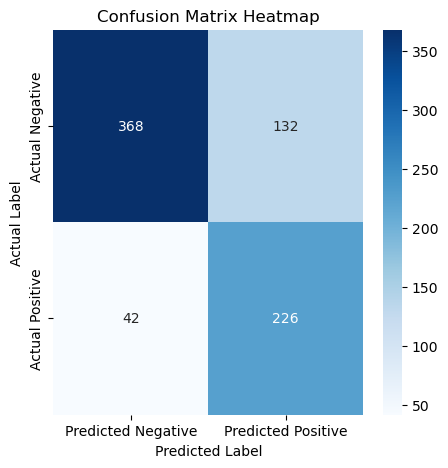

In [93]:
#Confusion Matrix Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_max_diff, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [87]:
# Create a dataframe for the confusion matrix with labels
cm_df = pd.DataFrame(cm_max_diff, 
                     columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])

# Print confusion matrix
print('\nConfusion matrix at this threshold:')
print(cm_df)


Confusion matrix at this threshold:
                 Predicted Negative  Predicted Positive
Actual Negative                 368                 132
Actual Positive                  42                 226


In [94]:
# Calculate metrics from confusion matrix
TN = cm_max_diff[0, 0]
FP = cm_max_diff[0, 1]
FN = cm_max_diff[1, 0]
TP = cm_max_diff[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

# Print metrics
print("DECISION TREE METRICS:")
print('Accuracy:', accuracy)
print('Misclassification Rate:', misclassification_rate)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

DECISION TREE METRICS:
Accuracy: 0.7734375
Misclassification Rate: 0.2265625
Sensitivity (Recall): 0.8432835820895522
Specificity: 0.736
Precision: 0.6312849162011173
F1 Score: 0.7220447284345047


### KNN CLASSIFICATION

In [99]:
#loading dataset
df=pd.read_csv("diabetes_dataset.csv")
x=df.drop(['Outcome'], axis=1)
y=df.Outcome

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [101]:
# Fitting the model based on KNN Classification
Kmodel = KNeighborsClassifier(n_neighbors=3)
Kmodel.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [104]:
# Predicting probabilities and adding to a dataframe
Kmodel.predict_proba(x)
df['prob'] = Kmodel.predict_proba(x)[:, 1]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prob
0,6,148,72,35,0,33.6,0.627,50,1,1.000000
1,1,85,66,29,0,26.6,0.351,31,0,0.333333
2,8,183,64,0,0,23.3,0.672,32,1,0.666667
3,1,89,66,23,94,28.1,0.167,21,0,0.000000
4,0,137,40,35,168,43.1,2.288,33,1,0.666667
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.333333
764,2,122,70,27,0,36.8,0.340,27,0,0.333333
765,5,121,72,23,112,26.2,0.245,30,0,0.000000
766,1,126,60,0,0,30.1,0.349,47,1,0.666667


In [109]:
K_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])
K_ROC

,Threshold,TP,TN,FP,FN,TPR,FPR


    Threshold     TP     TN     FP     FN       TPR    FPR
0         0.0  268.0  290.0  210.0    0.0  1.000000  0.420
1         0.1  268.0  290.0  210.0    0.0  1.000000  0.420
2         0.2  268.0  290.0  210.0    0.0  1.000000  0.420
3         0.3  268.0  290.0  210.0    0.0  1.000000  0.420
4         0.4  201.0  459.0   41.0   67.0  0.750000  0.082
5         0.5  201.0  459.0   41.0   67.0  0.750000  0.082
6         0.6  201.0  459.0   41.0   67.0  0.750000  0.082
7         0.7   87.0  500.0    0.0  181.0  0.324627  0.000
8         0.8   87.0  500.0    0.0  181.0  0.324627  0.000
9         0.9   87.0  500.0    0.0  181.0  0.324627  0.000
10        1.0    0.0  500.0    0.0  268.0  0.000000  0.000
AUC: 0.9198097014925373


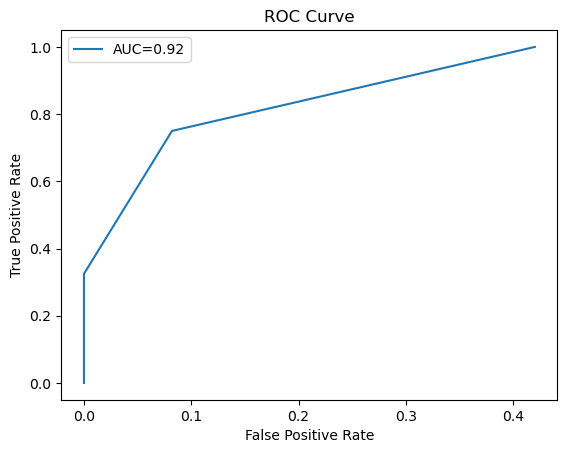

In [110]:
# Loop through different thresholds and calculating metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (df['prob'] > threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    K_ROC.loc[len(K_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})

# Compute AUC
auc = roc_auc_score(y, df['prob'])

# Print ROC curve and AUC
print(K_ROC)
print('AUC:', auc)

# Plot ROC curve from df_ROC
plt.plot(K_ROC['FPR'], K_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [112]:
# Compute TPR - FPR
K_ROC['TPR-FPR'] = K_ROC['TPR'] - K_ROC['FPR']

# Select threshold with max TPR - FPR
max_TPR_FPR_diff = K_ROC['TPR-FPR'].max()
K_threshold = K_ROC[K_ROC['TPR-FPR'] == max_TPR_FPR_diff]['Threshold'].values[0]
K_threshold

0.4

In [113]:
# Compute confusion matrix for this threshold
y_pred_selected_threshold = (df['prob'] > K_threshold).astype(int)
cm_max_diff = confusion_matrix(y, y_pred_selected_threshold)
cm_max_diff

array([[459,  41],
       [ 67, 201]], dtype=int64)

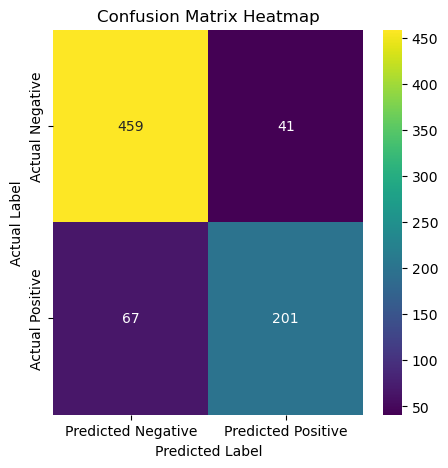

In [118]:
#Confusion Matrix Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_max_diff, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [114]:
# Create a dataframe for the confusion matrix with labels
cm_df = pd.DataFrame(cm_max_diff, 
                     columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])

# Print confusion matrix
print('\nConfusion matrix at this threshold:')
print(cm_df)


Confusion matrix at this threshold:
                 Predicted Negative  Predicted Positive
Actual Negative                 459                  41
Actual Positive                  67                 201


In [120]:
# Calculate metrics from confusion matrix
TN = cm_max_diff[0, 0]
FP = cm_max_diff[0, 1]
FN = cm_max_diff[1, 0]
TP = cm_max_diff[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

# Print metrics
print("KNN CLASSIFICATION METRICS:")
print('Accuracy:', accuracy)
print('Misclassification Rate:', misclassification_rate)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

KNN CLASSIFICATION METRICS:
Accuracy: 0.859375
Misclassification Rate: 0.140625
Sensitivity (Recall): 0.75
Specificity: 0.918
Precision: 0.8305785123966942
F1 Score: 0.7882352941176471
